# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

Nowadays, more and more brands of cars are converting from traditional gasoline to electric. In the state of Washington, there is now a tax exemption for those who buy electric vehicles to promote the production of electric vehicles. We will be doing a deep dive on which electric car brand is more likely to be bought & used in the state of washington. 

** WA_Tax_Exemptions_-_Potential_Eligibility_by_Make_Model_Excluding_Vehicle_Price_Criteria [MConverter.eu].txt
** Electric_Vehicle_Population_Data [MConverter.eu].txt

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: .CSV file

Method: The data was gathered using the "Downloading files" method from https://data.gov/

Dataset variables:

*   *Variable 1 --> EVH: Electrical vehicle type 
            - includes Battery Electric Vehicle (BEV) & Plug-In Hybrid Electric Vehicle (PHEV) 
*   *Variable 2 --> Make: EVH Make 
*    *Variable 3 --> Model: EVH Model 

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import csv

In [2]:
#FILL IN 1st data gathering and loading method
WA_EV_Population = pd.read_csv('Electric_Vehicle_Population_Data.csv')

#### Dataset 2

Type: .CSV file

Method: The data was gathered using by converting pandas .csv files to a numpy .npz file

Dataset variables:

*   *Variable 1 --> AFT: Alternative fuel type - includes Battery Electric & Plug-In Hybrid 
*   *Variable 2 --> V_Make: Vehicle Make 
*   *Variable 3 --> V_Model: Vehicle Model Description 

In [3]:
#FILL IN 2nd data gathering and loading method
url = 'https://raw.githubusercontent.com/misosoup1/Data-Wrangling/main/WA_Tax_Exemptions_-_Potential_Eligibility_by_Make_Model_Excluding_Vehicle_Price_Criteria.csv'
response = requests.get(url)

with open('file.csv', 'wb') as f:
    f.write(response.content)

In [4]:
WA_Tax_Exempt = pd.read_csv('file.csv')

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [5]:
#FILL IN - Inspecting the dataframe visually
WA_EV_Population.head()

Unnamed: 0  VIN (1-10) State  Postal Code  Model Year    Make    Model  \
0           0  5YJYGDEF5L    WA      98516.0        2020   TESLA  MODEL Y   
1           1  1N4BZ1CP1K    WA      98074.0        2019  NISSAN     LEAF   
2           2  5YJXCDE28G    WA      98031.0        2016   TESLA  MODEL X   
3           3  JHMZC5F37M    WA      98370.0        2021   HONDA  CLARITY   
4           4  WA1F2AFY4P    WA      98501.0        2023    AUDI     Q5 E   

                    Electric Vehicle Type  \
0          Battery Electric Vehicle (BEV)   
1          Battery Electric Vehicle (BEV)   
2          Battery Electric Vehicle (BEV)   
3  Plug-in Hybrid Electric Vehicle (PHEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             291   
1           Clean Alternative Fuel Vehicle Eligible             150   
2           Clean Alternative Fuel Vehicle Eligible             200   
3           Clean Alternative Fuel Vehicle Eligible              47   
4             Not eligible due to low battery range              23   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  22.0       124535071   
1          0                  45.0       102359449   
2          0                  33.0       228682037   
3          0                  23.0       171566447   
4          0                  22.0       234923230   

                Vehicle Location  \
0  POINT(-122.747429147.0821119)   
1  POINT(-122.031326647.6285782)   
2  POINT(-122.201252147.3931814)   
3     POINT(-122.6417747.737525)   
4     POINT(-122.8969247.043535)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.306701e+10  
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
3                         PUGET SOUND ENERGY INC       5.303509e+10  
4                         PUGET SOUND ENERGY INC       5.306701e+10

In [6]:
#FILL IN - Inspecting the dataframe programmatically
WA_EV_Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163003 entries, 0 to 163002
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         163003 non-null  int64  
 1   VIN (1-10)                                         163003 non-null  object 
 2   State                                              163003 non-null  object 
 3   Postal Code                                        162999 non-null  float64
 4   Model Year                                         163003 non-null  int64  
 5   Make                                               163003 non-null  object 
 6   Model                                              163003 non-null  object 
 7   Electric Vehicle Type                              163003 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  163003 non-null  object

Issue and justification: In WA_EV_Population, though we are not using this column for our analysis, the vehicle population formatting is missing a comma. The location is set in the format of a longitutde, latitude (i.e - (latitude, longitude)). 

### Quality Issue 2:

In [7]:
#FILL IN - Inspecting the dataframe visually
first_few_elements = WA_Tax_Exempt[:6]
print(first_few_elements)

   Model Year Vehicle Make          Vehicle Model Description  \
0        2024         Audi                          e-tron GT   
1        2024         Audi                       Q4 40 e-tron   
2        2024         Audi               Q4 50 e-tron quattro   
3        2024         Audi     Q4 Sportback 50 e-tron quattro   
4        2024         Audi                  Q8 e-tron quattro   
5        2024         Audi  Q8 Sportback e-tron ultra quattro   

  Alternative Fuel Type  
0      Battery Electric  
1      Battery Electric  
2      Battery Electric  
3      Battery Electric  
4      Battery Electric  
5      Battery Electric  


In [9]:
#FILL IN - Inspecting the dataframe programmatically
WA_Tax_Exempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Model Year                 793 non-null    int64 
 1   Vehicle Make               793 non-null    object
 2   Vehicle Model Description  793 non-null    object
 3   Alternative Fuel Type      793 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.9+ KB


Issue and justification: In WA_Tax_Exempt dataframe, the column 'vehicle model description' for vehicle make = Polestar has missing information/data. There are 3 rows where it is only labeled "1", "2", "3" respectively. Other rows for Polestar 2 has additional information pertaining to its vehicle model description, but consequentially these do not. 

### Tidiness Issue 1:

In [10]:
#FILL IN - Inspecting the dataframe visually
WA_EV_Population.head()

Unnamed: 0  VIN (1-10) State  Postal Code  Model Year    Make    Model  \
0           0  5YJYGDEF5L    WA      98516.0        2020   TESLA  MODEL Y   
1           1  1N4BZ1CP1K    WA      98074.0        2019  NISSAN     LEAF   
2           2  5YJXCDE28G    WA      98031.0        2016   TESLA  MODEL X   
3           3  JHMZC5F37M    WA      98370.0        2021   HONDA  CLARITY   
4           4  WA1F2AFY4P    WA      98501.0        2023    AUDI     Q5 E   

                    Electric Vehicle Type  \
0          Battery Electric Vehicle (BEV)   
1          Battery Electric Vehicle (BEV)   
2          Battery Electric Vehicle (BEV)   
3  Plug-in Hybrid Electric Vehicle (PHEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             291   
1           Clean Alternative Fuel Vehicle Eligible             150   
2           Clean Alternative Fuel Vehicle Eligible             200   
3           Clean Alternative Fuel Vehicle Eligible              47   
4             Not eligible due to low battery range              23   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  22.0       124535071   
1          0                  45.0       102359449   
2          0                  33.0       228682037   
3          0                  23.0       171566447   
4          0                  22.0       234923230   

                Vehicle Location  \
0  POINT(-122.747429147.0821119)   
1  POINT(-122.031326647.6285782)   
2  POINT(-122.201252147.3931814)   
3     POINT(-122.6417747.737525)   
4     POINT(-122.8969247.043535)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.306701e+10  
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
3                         PUGET SOUND ENERGY INC       5.303509e+10  
4                         PUGET SOUND ENERGY INC       5.306701e+10

In [11]:
#FILL IN - Inspecting the dataframe programmatically
WA_EV_Population.describe()

Unnamed: 0    Postal Code     Model Year  Electric Range  \
count  163003.000000  162999.000000  163003.000000   163003.000000   
mean    81501.000000   98170.717422    2020.258449       63.382183   
std     47055.057302    2467.998984       3.005057       94.323062   
min         0.000000    1730.000000    1997.000000        0.000000   
25%     40750.500000   98052.000000    2018.000000        0.000000   
50%     81501.000000   98122.000000    2021.000000       13.000000   
75%    122251.500000   98370.000000    2023.000000       84.000000   
max    163002.000000   99577.000000    2024.000000      337.000000   

           Base MSRP  Legislative District  DOL Vehicle ID  2020 Census Tract  
count  163003.000000         162637.000000    1.630030e+05       1.629990e+05  
mean     1198.344632             29.226861    2.153918e+08       5.297368e+10  
std      8825.505678             14.841717    7.874180e+07       1.612977e+09  
min         0.000000              1.000000    4.385000e+03       1.081042e+09  
25%         0.000000             18.000000    1.762441e+08       5.303301e+10  
50%         0.000000             33.000000    2.209718e+08       5.303303e+10  
75%         0.000000             42.000000    2.495753e+08       5.305307e+10  
max    845000.000000             49.000000    4.792548e+08       5.603300e+10

Issue and justification: In the WA_EV_Population dataframe, for the purpose of the analysis, we do not need the following columns/variables: VIN, County, City, Postal code, Model Year, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, and 2020 CensusTract. These should be removed for easier read and will be easier to merge the two dataframes later. 

### Tidiness Issue 2: 

In [12]:
#FILL IN - Inspecting the dataframe visually
WA_Tax_Exempt.head()

Model Year Vehicle Make       Vehicle Model Description  \
0        2024         Audi                       e-tron GT   
1        2024         Audi                    Q4 40 e-tron   
2        2024         Audi            Q4 50 e-tron quattro   
3        2024         Audi  Q4 Sportback 50 e-tron quattro   
4        2024         Audi               Q8 e-tron quattro   

  Alternative Fuel Type  
0      Battery Electric  
1      Battery Electric  
2      Battery Electric  
3      Battery Electric  
4      Battery Electric

In [13]:
#FILL IN - Inspecting the dataframe programmatically
WA_Tax_Exempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Model Year                 793 non-null    int64 
 1   Vehicle Make               793 non-null    object
 2   Vehicle Model Description  793 non-null    object
 3   Alternative Fuel Type      793 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.9+ KB


Issue and justification: In the WA_Tax_Exempt dataframe, the column/variable 'Model Year' will not be needed as a part of the analysis and therefore will be removed. The column/variable 'Vehicle Model Description' has a lot more information compared to the 'Model' WA_EV_Population dataframe, therefore we will try to filter through the only needed information. This will help us read our combined later. 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [14]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes are not impacted
Clean_EV_Pop = WA_EV_Population.copy()

In [15]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes are not impacted
Clean_Tax_Exempt = WA_Tax_Exempt.copy()

### **Quality Issue 1: EV_Pop 'Vehicle Location'**

In [16]:
# FILL IN - Apply the cleaning strategy
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df['Vehicle Location'] = df['Vehicle Location'].str.replace(' ', '')
df.to_csv('Electric_Vehicle_Population_Data.csv', sep=',')

In [17]:
# FILL IN - Validate the cleaning was successful
Clean_EV_Pop

Unnamed: 0  VIN (1-10) State  Postal Code  Model Year    Make  \
0                0  5YJYGDEF5L    WA      98516.0        2020   TESLA   
1                1  1N4BZ1CP1K    WA      98074.0        2019  NISSAN   
2                2  5YJXCDE28G    WA      98031.0        2016   TESLA   
3                3  JHMZC5F37M    WA      98370.0        2021   HONDA   
4                4  WA1F2AFY4P    WA      98501.0        2023    AUDI   
...            ...         ...   ...          ...         ...     ...   
162998      162998  7SAYGAEE6P    WA      98225.0        2023   TESLA   
162999      162999  7SAYGDEE4P    WA      98070.0        2023   TESLA   
163000      163000  7SAYGDEE0P    WA      98021.0        2023   TESLA   
163001      163001  JTDKARFP7H    WA      98387.0        2017  TOYOTA   
163002      163002  3FMTK3SU7N    WA      99203.0        2022    FORD   

                 Model                   Electric Vehicle Type  \
0              MODEL Y          Battery Electric Vehicle (BEV)   
1                 LEAF          Battery Electric Vehicle (BEV)   
2              MODEL X          Battery Electric Vehicle (BEV)   
3              CLARITY  Plug-in Hybrid Electric Vehicle (PHEV)   
4                 Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
...                ...                                     ...   
162998         MODEL Y          Battery Electric Vehicle (BEV)   
162999         MODEL Y          Battery Electric Vehicle (BEV)   
163000         MODEL Y          Battery Electric Vehicle (BEV)   
163001     PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
163002  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             291   
1                 Clean Alternative Fuel Vehicle Eligible             150   
2                 Clean Alternative Fuel Vehicle Eligible             200   
3                 Clean Alternative Fuel Vehicle Eligible              47   
4                   Not eligible due to low battery range              23   
...                                                   ...             ...   
162998  Eligibility unknown as battery range has not b...               0   
162999  Eligibility unknown as battery range has not b...               0   
163000  Eligibility unknown as battery range has not b...               0   
163001              Not eligible due to low battery range              25   
163002  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  22.0       124535071   
1               0                  45.0       102359449   
2               0                  33.0       228682037   
3               0                  23.0       171566447   
4               0                  22.0       234923230   
...           ...                   ...             ...   
162998          0                  40.0       236252152   
162999          0                  34.0       224470599   
163000          0                   1.0       244676939   
163001          0                   2.0       276466165   
163002          0                   6.0       197399828   

                     Vehicle Location  \
0       POINT(-122.747429147.0821119)   
1       POINT(-122.031326647.6285782)   
2       POINT(-122.201252147.3931814)   
3          POINT(-122.6417747.737525)   
4          POINT(-122.8969247.043535)   
...                               ...   
162998    POINT(-122.48611548.761615)   
162999      POINT(-122.4604947.44873)   
163000    POINT(-122.17945847.802589)   
163001      POINT(-122.43511547.1045)   
163002    POINT(-117.42526547.635365)   

                                         Electric Utility  2020 Census Tract  
0                                  PUGET SOUND ENERGY INC       5.306701e+10  
1           PUGET SOUND ENERGY INC||CITY OF TACOMA - 

Justification: This cleaning strategy programmatically helps us add the comma in between the longitude and latitiude points in order to be more accurate and follow standard format. 

### **Quality Issue 2: Tax_Exempt 'Vehicle Model Description'

In [22]:
# Replace this with your actual data loading code
Clean_Tax_Exempt = pd.read_csv('file.csv')

# Rows to remove
rows_to_remove = [510, 511]

# Use pandas drop method to remove rows
Clean_Tax_Exempt = Clean_Tax_Exempt.drop(index=rows_to_remove)

# If you want to reset the index after removing rows
Clean_Tax_Exempt = Clean_Tax_Exempt.reset_index(drop=True)

In [23]:
#FILL IN - Validate the cleaning was successful
Clean_Tax_Exempt

Model Year Vehicle Make        Vehicle Model Description  \
0          2024         Audi                        e-tron GT   
1          2024         Audi                     Q4 40 e-tron   
2          2024         Audi             Q4 50 e-tron quattro   
3          2024         Audi   Q4 Sportback 50 e-tron quattro   
4          2024         Audi                Q8 e-tron quattro   
..          ...          ...                              ...   
786        2022        Volvo  XC90 T8 AWD Recharge ext. Range   
787        2021        Volvo                     XC40 AWD BEV   
788        2012          VPG                         MV-1 CNG   
789        2011          VPG                         MV-1 CNG   
790        2021     Westward                           Max-EV   

    Alternative Fuel Type  
0        Battery Electric  
1        Battery Electric  
2        Battery Electric  
3        Battery Electric  
4        Battery Electric  
..                    ...  
786        Plug-in Hybrid  
787      Battery Electric  
788                   CNG  
789                   CNG  
790      Battery Electric  

[791 rows x 4 columns]

Justification: This cleaning method was to used to visually show the dropping of unnecessary rows that made decreassed the quality of our dataframe. Going back to the earlier sections, we see that the originally the dataframe had 793 rows and after the drop it now has 791 rows, confirming that our method worked. 

### **Tidiness Issue 1: Removing Extra Information from EV_Pop**

In [25]:
#FILL IN - Apply the cleaning strategy

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Remove the columns 
df = df.drop(['Make', 'Model'], axis = 1)

# Write the dataframe to a new csv file
df.to_csv('Electric_Vehicle_Population_Data.csv', index=False)

In [26]:
#FILL IN - Validate the cleaning was successful
Clean_EV_Pop

Unnamed: 0  VIN (1-10) State  Postal Code  Model Year    Make  \
0                0  5YJYGDEF5L    WA      98516.0        2020   TESLA   
1                1  1N4BZ1CP1K    WA      98074.0        2019  NISSAN   
2                2  5YJXCDE28G    WA      98031.0        2016   TESLA   
3                3  JHMZC5F37M    WA      98370.0        2021   HONDA   
4                4  WA1F2AFY4P    WA      98501.0        2023    AUDI   
...            ...         ...   ...          ...         ...     ...   
162998      162998  7SAYGAEE6P    WA      98225.0        2023   TESLA   
162999      162999  7SAYGDEE4P    WA      98070.0        2023   TESLA   
163000      163000  7SAYGDEE0P    WA      98021.0        2023   TESLA   
163001      163001  JTDKARFP7H    WA      98387.0        2017  TOYOTA   
163002      163002  3FMTK3SU7N    WA      99203.0        2022    FORD   

                 Model                   Electric Vehicle Type  \
0              MODEL Y          Battery Electric Vehicle (BEV)   
1                 LEAF          Battery Electric Vehicle (BEV)   
2              MODEL X          Battery Electric Vehicle (BEV)   
3              CLARITY  Plug-in Hybrid Electric Vehicle (PHEV)   
4                 Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
...                ...                                     ...   
162998         MODEL Y          Battery Electric Vehicle (BEV)   
162999         MODEL Y          Battery Electric Vehicle (BEV)   
163000         MODEL Y          Battery Electric Vehicle (BEV)   
163001     PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
163002  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             291   
1                 Clean Alternative Fuel Vehicle Eligible             150   
2                 Clean Alternative Fuel Vehicle Eligible             200   
3                 Clean Alternative Fuel Vehicle Eligible              47   
4                   Not eligible due to low battery range              23   
...                                                   ...             ...   
162998  Eligibility unknown as battery range has not b...               0   
162999  Eligibility unknown as battery range has not b...               0   
163000  Eligibility unknown as battery range has not b...               0   
163001              Not eligible due to low battery range              25   
163002  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  22.0       124535071   
1               0                  45.0       102359449   
2               0                  33.0       228682037   
3               0                  23.0       171566447   
4               0                  22.0       234923230   
...           ...                   ...             ...   
162998          0                  40.0       236252152   
162999          0                  34.0       224470599   
163000          0                   1.0       244676939   
163001          0                   2.0       276466165   
163002          0                   6.0       197399828   

                     Vehicle Location  \
0       POINT(-122.747429147.0821119)   
1       POINT(-122.031326647.6285782)   
2       POINT(-122.201252147.3931814)   
3          POINT(-122.6417747.737525)   
4          POINT(-122.8969247.043535)   
...                               ...   
162998    POINT(-122.48611548.761615)   
162999      POINT(-122.4604947.44873)   
163000    POINT(-122.17945847.802589)   
163001      POINT(-122.43511547.1045)   
163002    POINT(-117.42526547.635365)   

                                         Electric Utility  2020 Census Tract  
0                                  PUGET SOUND ENERGY INC       5.306701e+10  
1           PUGET SOUND ENERGY INC||CITY OF TACOMA - 

Justification: We were able to programmatically drop all of the unnecessary columns that were not going to be used in our analysis. 

### **Tidiness Issue 2: FILL IN**

In [30]:
#FILL IN - Apply the cleaning strategy
# Read the csv file
df = pd.read_csv('WA_Tax_Exemptions_-_Potential_Eligibility_by_Make_Model_Excluding_Vehicle_Price_Criteria.csv')

# Remove the column
df = df.drop('Vehicle Model Description', axis=1)

# Write the csv file
df.to_csv('WA_Tax_Exemptions_-_Potential_Eligibility_by_Make_Model_Excluding_Vehicle_Price_Criteria.csv', index=False)

In [31]:
#FILL IN - Validate the cleaning was successful
Clean_Tax_Exempt = df 
df

Model Year Alternative Fuel Type
0          2024        Plug-in Hybrid
1          2024      Battery Electric
2          2024      Battery Electric
3          2024      Battery Electric
4          2024      Battery Electric
..          ...                   ...
865        2022        Plug-in Hybrid
866        2021      Battery Electric
867        2012                   CNG
868        2011                   CNG
869        2021      Battery Electric

[870 rows x 2 columns]

Justification: This method was done to programmatically remove the unnecessary column from our dataframe. 

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [32]:
#FILL IN - Remove unnecessary variables and combine datasets
df1 = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df2 = pd.read_csv('WA_Tax_Exemptions_-_Potential_Eligibility_by_Make_Model_Excluding_Vehicle_Price_Criteria.csv')

# Combine the two dataframes
df_merged = pd.concat([df1, df2])

# Print the combined dataframe
print(df)

     Model Year Alternative Fuel Type
0          2024        Plug-in Hybrid
1          2024      Battery Electric
2          2024      Battery Electric
3          2024      Battery Electric
4          2024      Battery Electric
..          ...                   ...
865        2022        Plug-in Hybrid
866        2021      Battery Electric
867        2012                   CNG
868        2011                   CNG
869        2021      Battery Electric

[870 rows x 2 columns]


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [33]:
#FILL IN - saving data
df_merged.to_csv('WA_EV_Pop_And_Tax.csv', index = False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Which electric vehicle type is more likely bought in the state of Washington?

In [37]:
#Visual 1 - FILL IN
merged_df = pd.read_csv('WA_EV_Pop_And_Tax.csv')

/tmp/ipykernel_50/341873690.py:2: DtypeWarning: Columns (2,3,6,7,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('WA_EV_Pop_And_Tax.csv')


In [38]:
merged_df.value_counts()

Series([], dtype: int64)

In [39]:
# Specify the column and values for the bar chart
selected_column = 'Electric Vehicle Type'
values_to_plot = ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']

# Filter the DataFrame for the specified values
filtered_data = merged_df[merged_df[selected_column].isin(values_to_plot)]

# Create the bar chart
plt.bar(values_to_plot, filtered_data[selected_column].value_counts(), color=['blue', 'orange'])

# Add labels and title
plt.xlabel(selected_column)
plt.ylabel('Count')
plt.title(f'Bar Chart for {selected_column}')

# Show the plot
plt.show()

*Answer to research question: In order for us to determine which type of electric vehicle type is bough often, I decided to use a bar chart. The code above produces a bar chart to show a clear comparison that Battery Electric Vehicle (BEV) is bought far more often than Plug-In Hybrid Electric Vehicle (PHEV)

*Research Question: How many of those electric cars being bought in Washington will be eligble for clean alternative fuel?

In [40]:
#Visual 2 - FILL IN
merged_df = pd.read_csv('WA_EV_Pop_And_Tax.csv')

/tmp/ipykernel_50/1878770542.py:2: DtypeWarning: Columns (2,3,6,7,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('WA_EV_Pop_And_Tax.csv')


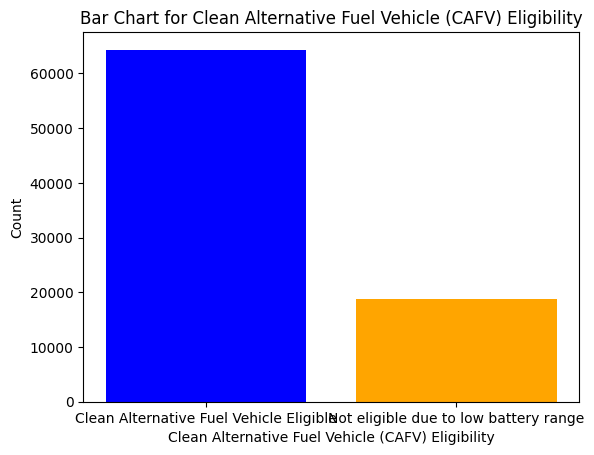

In [41]:
# Specify the column and values for the bar chart
selected_column = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
values_to_plot = ['Clean Alternative Fuel Vehicle Eligible', 'Not eligible due to low battery range']

# Filter the DataFrame for the specified values
filtered_data = merged_df[merged_df[selected_column].isin(values_to_plot)]

# Create the bar chart
plt.bar(values_to_plot, filtered_data[selected_column].value_counts(), color=['blue', 'orange'])

# Add labels and title
plt.xlabel(selected_column)
plt.ylabel('Count')
plt.title(f'Bar Chart for {selected_column}')

# Show the plot
plt.show()

*Answer to research question:* I decided to do another bar chart comparison for this research question since this was the best visual description that gave a clear answer. A majority of the vehicles are eligible for clean alternative fuel vehicle (CAFV).

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time, I would have explored the difference between the brands and their tyoes, specifically battery electric vs plug-in hybrid vehicles. As for data quality, I would have liked to compare those 2 sectors between the data sets. 